Ici on va dezoomer un image par 2 ce qu'y va éviter le repliement de spectre, pour ainsi supprimer l'aliasing d'une image.


On suppose que l'image est de taille pair (2k x 2q)

In [2]:
from libfonction import *

highest: 29657287.0


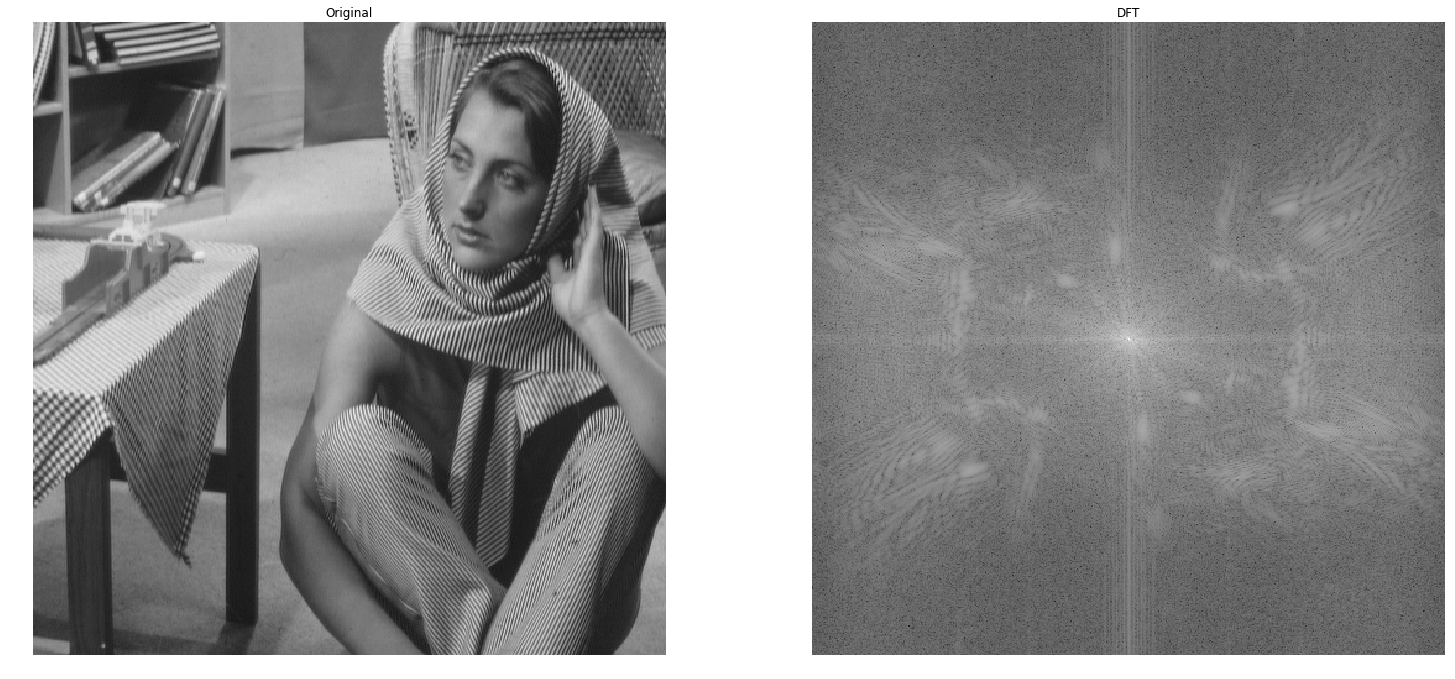

In [3]:
IMAGE = "barbara"
lena = Image.open(IMAGE+".png")
plot(lena)

In [4]:
u = np.asarray(lena)
u = grey(u)
u_dft = np.fft.fft2(u)
u_dft = shift2D(u_dft)

In [5]:
(X, Y) =  u_dft.shape
z_dft = u_dft[X//4:3*(X//4),Y//4:3*(Y//4)]
z_dft = shift2D(z_dft)
z_dft.shape

(256, 256)

d:\python37\lib\site-packages\ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


highest: 7381425.0


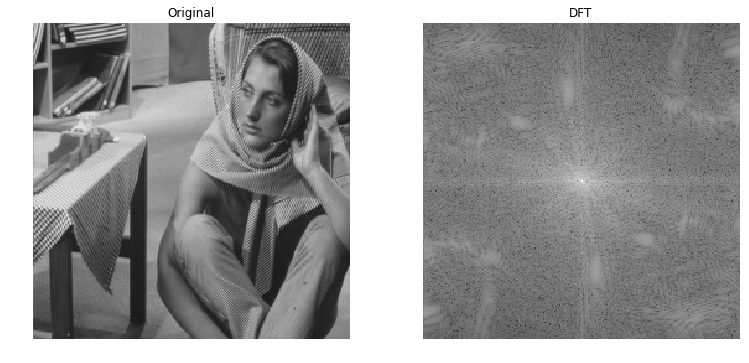

In [6]:
z = np.fft.ifft2(z_dft/4)
z_img = Image.fromarray(z.astype(np.uint8))
z_img.save("unzoom_"+IMAGE+".png")
plot(z_img)

In [7]:
dft_1 = logOperator(abs(shift2D(np.fft.fft2(u))))
img_dft_1 = Image.fromarray(dft_1.astype(np.uint8))
dft_2 = logOperator(abs(shift2D(z_dft)))
img_dft_2 = Image.fromarray(dft_2.astype(np.uint8))
img_dft_1.save("dft_entier.png")
img_dft_2.save("dft_moitie.png")

highest: 29657287.0
highest: 29657287.0


In [17]:
dft_r = np.dstack((dft_1,dft_1,dft_1))
dft_r[X//4:3*X//4, Y//4:Y//4+1] = np.array((255,0,0))
dft_r[X//4:3*X//4, 3*Y//4:3*Y//4+1] = np.array((255,0,0))
dft_r[X//4:X//4+1, Y//4:3*Y//4] = np.array((255,0,0))
dft_r[3*X//4:3*X//4+1, Y//4:3*Y//4] = np.array((255,0,0))

In [18]:
img_dft_r = Image.fromarray(dft_r.astype(np.uint8))
img_dft_r.save("dft_entier_square.png")